In [1]:
import gym
import agent as my_agent
import torch
import variable as v
from tqdm import tqdm
import utils
import matplotlib.pyplot as plt

In [2]:
env = gym.make('MountainCar-v0').env

In [3]:
num_action = env.action_space.n
num_state = env.observation_space.shape[0]

In [4]:
nn_archi = [{'type': 'linear', 'in': num_state, 'out': 20, 'activation': 'None'}, 
            {'type': 'linear', 'in': 20, 'out': 40, 'activation': 'None'},
            {'type': 'linear', 'in': 40, 'out': 20, 'activation': 'None'},
            {'type': 'linear', 'in': 20, 'out': num_action, 'activation': 'None'}]
agent_init = {
    'discount_factor': .99,
    'learning_rate': {},
    'exploration_rate': {
        'er': 0.0001,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.05,
        'constant_er': False
    },
    'num_action': num_action,
    'nn_archi': nn_archi,
    'max_position_init': .04,
    'max_position_reward_bonus': 10
}

In [5]:
dqn_agent = my_agent.DQN(agent_init)

In [6]:
timesteps_per_episode = list()
rewards_per_episode = list()
epoch_size = 20
n_episode = 3000
t_max_per_episode = 300
verbose = False
graphical = False

In [7]:
for i_episode in tqdm(range(n_episode)):
    
    rewards = 0
    state = env.reset()
    next_action = dqn_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        if graphical:
            env.render()
            
        state, reward, done, info = env.step(next_action)
        reward = dqn_agent.max_position_reward_function(state[0], reward)
        next_action = dqn_agent.update(state, reward, done)
        
        rewards += reward
        
        if done:
            break
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    
    dqn_agent.exploration_handler.next()
    
env.close()

100%|██████████| 3000/3000 [08:35<00:00,  5.82it/s]


In [8]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.max()

299

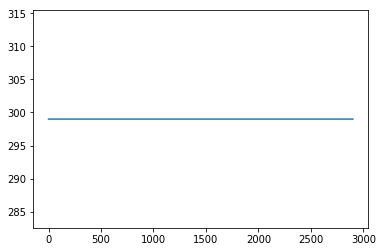

In [9]:
timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=100)
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)

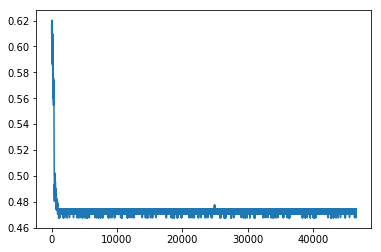

In [11]:
loss_history_moving_avg = utils.moving_average(dqn_agent.nn_handler.loss_history, n=100)

plt.plot(range(len(loss_history_moving_avg)),loss_history_moving_avg)

In [12]:
rewards_per_episode = np.array(rewards_per_episode)
rewards_per_episode.max()

20.0

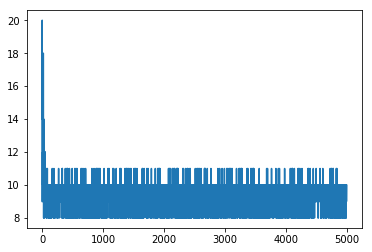

In [13]:
rewards_per_episode_rolling_mean = utils.moving_average(rewards_per_episode, n=1)
plt.plot(range(len(rewards_per_episode_rolling_mean)), rewards_per_episode_rolling_mean)

In [ ]:
next_state = env.reset()
next_state_tensor = torch.tensor([
            next_state[0],
            next_state[1]
        ]).type(torch.FloatTensor)
values = dqn_agent.nn_handler.nn(next_state_tensor)

In [ ]:
values.unsqueeze(1).shape

In [ ]:
next_state

In [ ]:
values

In [ ]:
max_value = values.max(0)[0]

In [ ]:
max_value

In [ ]:
values[0]

In [ ]:
values[max_value] = values[0] * .99 + 1.0

In [ ]:
values

In [ ]:
class NeuralNetworkHandler(torch.nn.Module):
    def return_state_tensor(state):
        return state


In [ ]:
def a(nn_archi):
    layers = list()

    for layer_args in nn_archi:
        layer_type = layer_args['type']
        in_features, out_features, activation = layer_args["in"], layer_args["out"], layer_args["activation"]
        layers.append(v.layer_name_to_obj[layer_type](in_features, out_features))
        layers.append(v.activation_name_to_obj[activation]())
        
    return layers

In [ ]:
l = a(nn_archi)

In [ ]:
l

In [ ]:
NeuralNetworkHandler(*l)

In [ ]:
def test(a, b=1, c=1):
    return a+b+c

In [ ]:
d = {'b': 2, 'c': 9}
d1 = {'b': 2}

In [ ]:
test(4, *d1.values())

In [9]:
env.close()